In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
import sys
sys.path.insert(0, "../../")
import src.constants.names as names
from src.constants.miscellaneous import DATA, MODEL, PARAMS, TRAIN, VALIDATION, TEST, CONFIG_FILE_NAME, IMAGE, LABEL, \
    TRAILING_HASHTAG, IMAGE_DATA_FILE_NAME, LABELS_FILE_NAME, PATCH_DDSM_PROCESSED, CHECKPOINT_ENDING, PARAM_SEPARATOR, \
    ID
import os

['././run_number:24-noise_std:0.004-data%model_name:./mobilenet_v2/3.checkpoint',
 '././run_number:23-noise_std:0.004-data%model_name:./mobilenet_v2/2.checkpoint',
 '././run_number:22-noise_std:0.004-data%model_name:./mobilenet_v2/1.checkpoint',
 '././run_number:26-noise_std:0.004-data%model_name:./mobilenet_v2/5.checkpoint',
 '././run_number:21-noise_std:0.004-data%model_name:./mobilenet_v2/0.checkpoint',
 '././run_number:25-noise_std:0.004-data%model_name:./mobilenet_v2/4.checkpoint',
 '././run_number:27-noise_std:0.004-data%model_name:./mobilenet_v2/6.checkpoint']

In [115]:
loader_name = 'validation'
all_run_pathes = [root for root, dir_, files in os.walk('./.') if 'test_predictions' in files]
run_dict = {}
for std in ['0.001', '0.002', '0.003', '0.004', '0.005', '0.006', '0.007']:
     run_dict[std] = [p for p in all_run_pathes if std in p]
run_pathes = run_dict['0.004']


#  815#validation  6516#train  1845#test

run_storage = {}

for run_path in run_pathes:
    def get_all(loader_name: str):
        if loader_name == 'validation':
            number_of_patterns = 814
        elif loader_name == 'train':
            number_of_patterns = 6516
        elif loader_name == 'test':
            number_of_patterns = 1845

        number_of_classes = 5
        feature_map_dimension = 1280 # 512-resnet, 1280-mobilenet


        predictions_file = os.path.join(run_path, '_'.join([loader_name, names.PREDICTIONS]))
        targets_file = os.path.join(run_path, '_'.join([loader_name, names.TARGETS]))
        prediction_feature_map_file = os.path.join(run_path, '_'.join([loader_name, names.FEATURES]))
        prediction_ids_file = os.path.join(run_path, '_'.join([loader_name, names.PREDICTIONS, ID]))
        prediction_classes_file = os.path.join(run_path, '_'.join([loader_name, names.PREDICTIONS, ID])) # ERROR IN NAME
        prediction_classes_counts_file = os.path.join(run_path, '_'.join([loader_name, 'predicted_classes_counts']))


        prediction_storage = np.memmap(predictions_file, dtype='float32', mode='r',
                                                      shape=(number_of_patterns, number_of_classes))
        loader_feature_map_storage = np.memmap(prediction_feature_map_file, dtype='float32', mode='r',
                                                      shape=(number_of_patterns, feature_map_dimension))
        loader_correct_number_storage = np.memmap(prediction_classes_file, dtype='int32', mode='r',
                                                      shape=(number_of_patterns))
        loader_class_predicted_counts_storage = np.memmap(prediction_classes_counts_file, dtype='int32', mode='r',
                                                  shape=(number_of_patterns, number_of_classes))
        loader_target_storage = np.memmap(targets_file, dtype='int32', mode='r',
                                                      shape=(number_of_patterns))
        loader_ids_storage = np.memmap(prediction_ids_file, dtype='int32', mode='r',
                                                      shape=(number_of_patterns))

        return prediction_storage, loader_feature_map_storage, loader_correct_number_storage, loader_class_predicted_counts_storage, loader_target_storage, loader_ids_storage 

    storage_dict = {}

    for loader in ['train', 'validation', 'test']:
#     for loader in ['validation', 'test']:
        print(loader)
        storage_dict[loader] = get_all(loader)
    
    run_storage[run_path] = storage_dict



train
validation
test
train
validation
test
train
validation
test
train
validation
test
train
validation
test
train
validation
test
train
validation
test


In [84]:
storage_names = ['prediction_storage',
'loader_feature_map_storage',
'loader_correct_number_storage,',
'loader_class_predicted_counts_storage',
'loader_target_storage',
'loader_ids_storage']

for i, name in enumerate(storage_names):
    print(i, name)

0 prediction_storage
1 loader_feature_map_storage
2 loader_correct_number_storage,
3 loader_class_predicted_counts_storage
4 loader_target_storage
5 loader_ids_storage


# UMAP part feature map

In [85]:
storage_dict = run_storage[run_pathes[0]]
print(storage_dict.keys())

import umap

# data = np.concatenate((storage_dict['validation'][1][:], storage_dict['train'][1][:], storage_dict['test'][1][:]), axis=0)
# targets_unified = np.concatenate((storage_dict['validation'][3][:], storage_dict['train'][3][:], storage_dict['test'][3][:]), axis=0)

data = storage_dict['test'][1][:]
targets_unified = storage_dict['test'][4][:]


reducer = umap.UMAP(random_state=42, n_components=3)
reducer.fit(data)

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)



dict_keys(['train', 'validation', 'test'])


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=3, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [86]:
val_arr = np.array(storage_dict['validation'][1][:])[storage_dict['validation'][4][:] != 0]
test_arr = np.array(storage_dict['test'][1][:])[storage_dict['test'][4][:] != 0]
train_arr = np.array(storage_dict['train'][1][:])[storage_dict['train'][4][:] != 0]

print('1')
val_arr = reducer.transform(val_arr) 
print('2')
test_arr = reducer.transform(test_arr)
print('3')
train_arr = reducer.transform(train_arr) 


val_arr_targets = np.array(storage_dict['validation'][4][:])[storage_dict['validation'][4][:] != 0]
test_arr_targets = np.array(storage_dict['test'][4][:])[storage_dict['test'][4][:] != 0]
train_arr_targets = np.array(storage_dict['train'][4][:])[storage_dict['train'][4][:] != 0]



norm_values = np.percentile(val_arr, 95, axis=0)

test_arr = test_arr / norm_values
val_arr = val_arr / norm_values
# train_arr = train_arr / norm_values

def get_distances_to_train(sett, targets):
    distances = []
    correct = []
    
    for point_id in tqdm(range(sett.shape[0])):
        point = sett[point_id,...]
        dists_to_train = np.linalg.norm(train_arr - point, axis = 1, ord=2)
        min_id = np.argmin(dists_to_train)
        distances.append(dists_to_train[min_id])
        correct.append(train_arr_targets[min_id] == targets[point_id])
        
    return np.array(distances), np.array(correct)

val_dist, val_cor = get_distances_to_train(val_arr, val_arr_targets)

test_dist, test_cor = get_distances_to_train(test_arr, test_arr_targets)


1
2
3


100%|██████████| 1476/1476 [00:00<00:00, 4732.72it/s]


In [87]:
perc = 10
np.percentile(val_dist, perc), np.percentile(test_dist, perc), 

# np.array(storage_dict['validation'][4][:])[storage_dict['validation'][4][:] != 0][val_dist <65.02788961751449]




(4.735998824485181, 4.604870560375494)

# K-NN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

def get_knn_res_for_N(n):
    print(n)
    neigh = KNeighborsClassifier(n_neighbors=n)

    val_arr = np.array(storage_dict['validation'][1][:])#[storage_dict['validation'][4][:] != 0]
    test_arr = np.array(storage_dict['test'][1][:])#[storage_dict['test'][4][:] != 0]
    train_arr = np.array(storage_dict['train'][1][:])#[storage_dict['train'][4][:] != 0]

    val_arr = reducer.transform(val_arr) 
    test_arr = reducer.transform(test_arr)
    train_arr = reducer.transform(train_arr) 

    val_arr_targets = np.array(storage_dict['validation'][4][:])#[storage_dict['validation'][4][:] != 0]
    test_arr_targets = np.array(storage_dict['test'][4][:])#[storage_dict['test'][4][:] != 0]
    train_arr_targets = np.array(storage_dict['train'][4][:])#[storage_dict['train'][4][:] != 0]


    neigh.fit(train_arr, train_arr_targets) 

    return neigh.score(train_arr, train_arr_targets), neigh.score(val_arr, val_arr_targets), neigh.score(test_arr, test_arr_targets)



from sklearn.ensemble import RandomForestClassifier

def get_res_for_N(n, d):
    print(n)
    neigh = None
    neigh = RandomForestClassifier(n_estimators=n, max_depth=d,random_state=0, criterion='entropy')

    val_arr = np.array(storage_dict['validation'][1][:])#[storage_dict['validation'][4][:] != 0]
    test_arr = np.array(storage_dict['test'][1][:])#[storage_dict['test'][4][:] != 0]
    train_arr = np.array(storage_dict['train'][1][:])#[storage_dict['train'][4][:] != 0]

#     val_arr = reducer.transform(val_arr) 
#     test_arr = reducer.transform(test_arr)
#     train_arr = reducer.transform(train_arr) 

    val_arr_targets = np.array(storage_dict['validation'][4][:])#[storage_dict['validation'][4][:] != 0]
    test_arr_targets = np.array(storage_dict['test'][4][:])#[storage_dict['test'][4][:] != 0]
    train_arr_targets = np.array(storage_dict['train'][4][:])#[storage_dict['train'][4][:] != 0]


    neigh.fit(train_arr, train_arr_targets) 

    return neigh.score(train_arr, train_arr_targets), neigh.score(val_arr, val_arr_targets), neigh.score(test_arr, test_arr_targets)

from sklearn import svm

def get_svm_res_for_N(n):
    print(n)
    neigh = None
    neigh = svm.SVC(gamma='scale')

    val_arr = np.array(storage_dict['validation'][1][:])#[storage_dict['validation'][4][:] != 0]
    test_arr = np.array(storage_dict['test'][1][:])#[storage_dict['test'][4][:] != 0]
    train_arr = np.array(storage_dict['train'][1][:])#[storage_dict['train'][4][:] != 0]

    val_arr = reducer.transform(val_arr) 
    test_arr = reducer.transform(test_arr)
    train_arr = reducer.transform(train_arr) 

    val_arr_targets = np.array(storage_dict['validation'][4][:])#[storage_dict['validation'][4][:] != 0]
    test_arr_targets = np.array(storage_dict['test'][4][:])#[storage_dict['test'][4][:] != 0]
    train_arr_targets = np.array(storage_dict['train'][4][:])#[storage_dict['train'][4][:] != 0]


    neigh.fit(train_arr, train_arr_targets) 

    return neigh.score(train_arr, train_arr_targets), neigh.score(val_arr, val_arr_targets), neigh.score(test_arr, test_arr_targets)



In [89]:
results = []
for n in [100, 2, 3, 100, 150, 190, 200]:
    for d in [3,5,10,20, 50]:
        r = get_res_for_N(n, d)
        results.append(r)
        print(r)

100
(0.8984039287906691, 0.7936117936117936, 0.7013550135501355)
100
(0.9189686924493554, 0.8022113022113022, 0.7008130081300813)
100
(0.9964702271332105, 0.8095823095823096, 0.7013550135501355)
100
(1.0, 0.8071253071253072, 0.7029810298102981)
100


KeyboardInterrupt: 

In [ ]:
run_pathes

In [97]:
storage_dict = run_storage[run_pathes[2]]

import umap
from scipy.special import softmax

# data = np.concatenate((storage_dict['validation'][1][:], storage_dict['train'][1][:], storage_dict['test'][1][:]), axis=0)
# targets_unified = np.concatenate((storage_dict['validation'][3][:], storage_dict['train'][3][:], storage_dict['test'][3][:]), axis=0)

# data = softmax(storage_dict['test'][0][:], axis=1)
data = storage_dict['train'][1][:]
targets_unified = storage_dict['train'][4][:]


reducer = umap.UMAP(random_state=42, n_components=3)
reducer.fit(data)




/home/wm/anaconda3/envs/mammo/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/envs/mammo/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=3, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

<IPython.core.display.Javascript object>


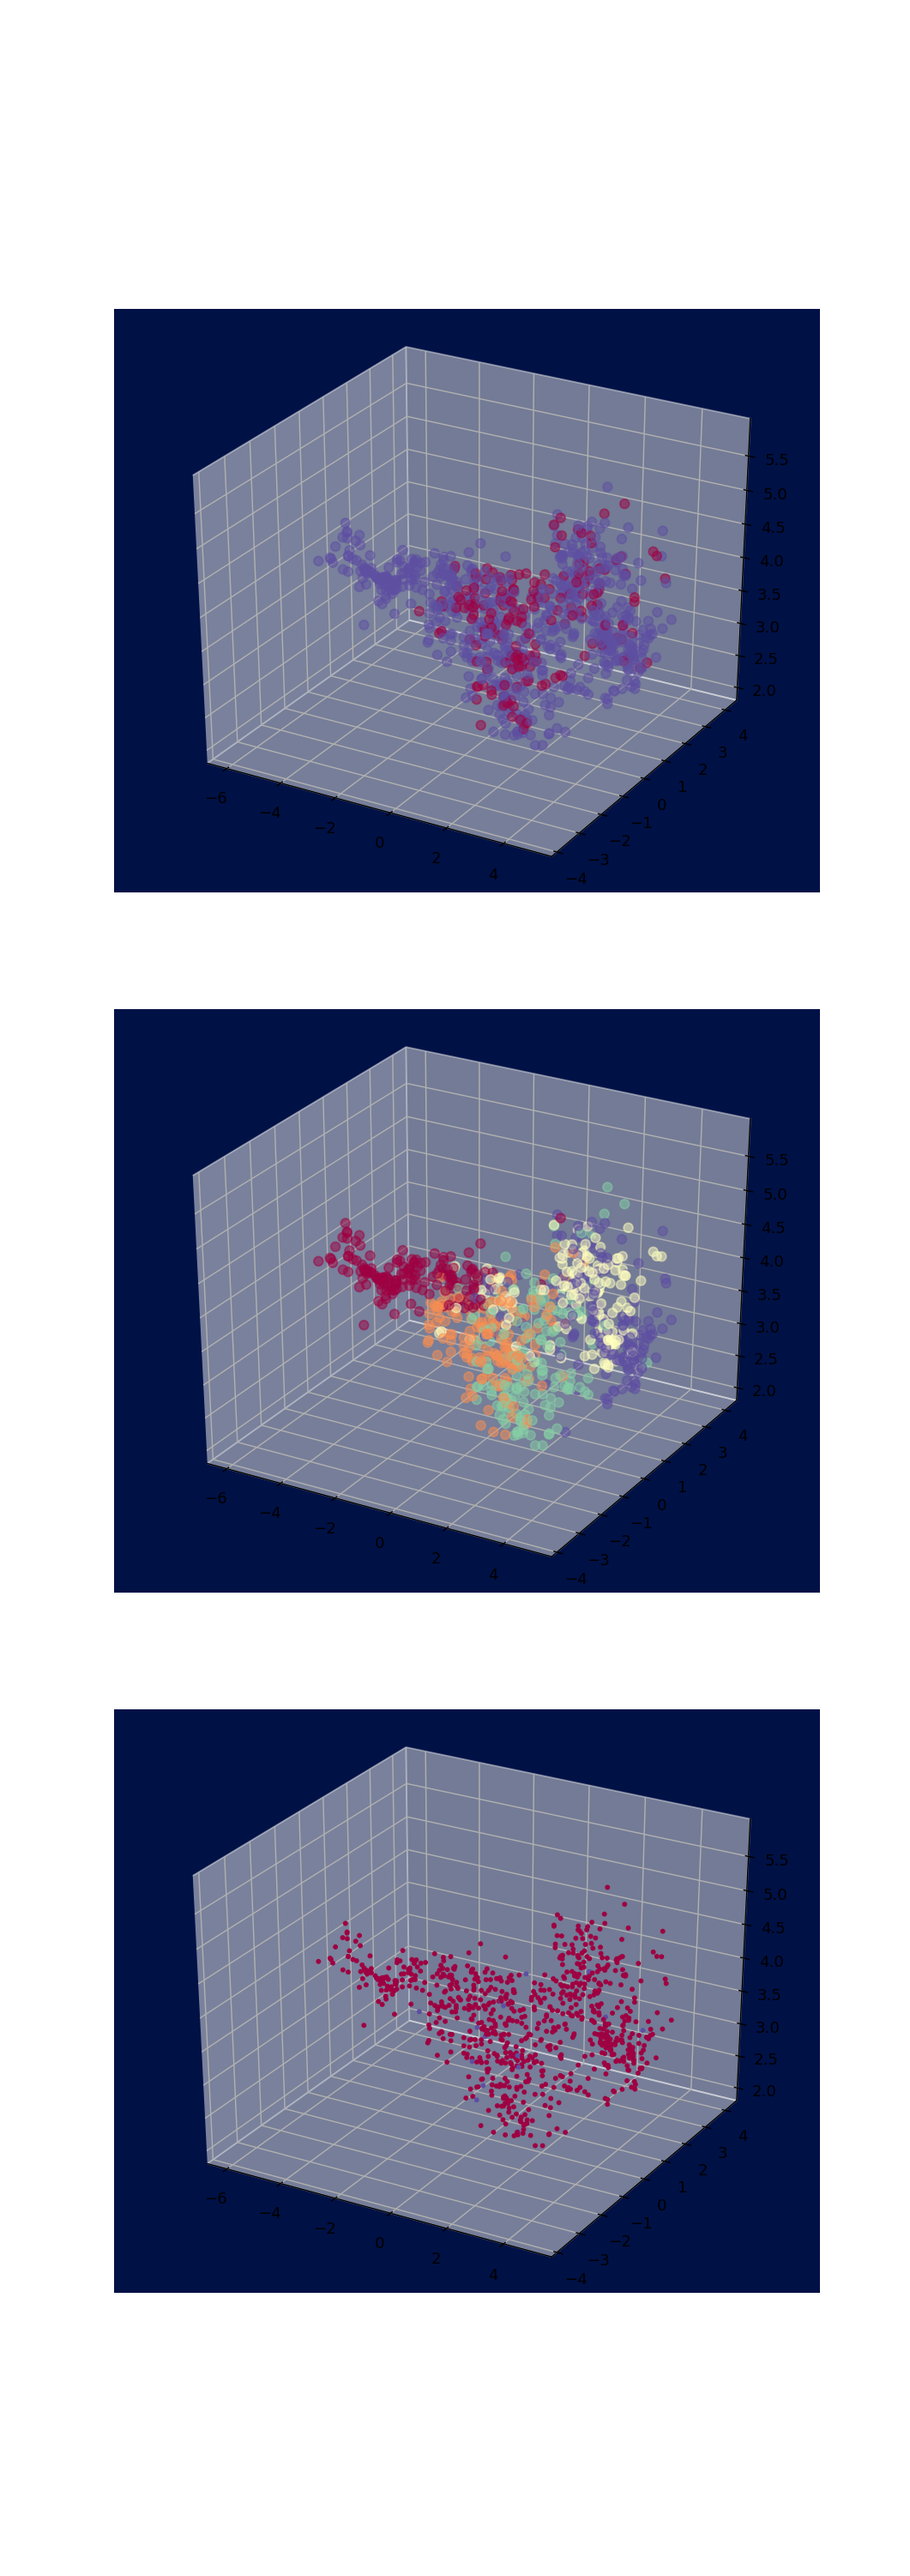

In [182]:
for_loader = 'validation'

# embedding = reducer.transform(softmax(storage_dict[for_loader][0][:], axis=1))
embedding = reducer.transform(storage_dict[for_loader][1][:])

# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
# assert(np.all(embedding == reducer.embedding_))
embedding.shape

res = np.argmax(storage_dict[for_loader][0][:], axis=1) == np.array(storage_dict[for_loader][4][:])

visualize_data = embedding
visualize_target = storage_dict[for_loader][4][:]
visualize_target_2 = res
# visualize_target_3 = np.argmax(storage_dict[for_loader][0][:], axis=1)
visualize_target_3 = ress.mean(axis=0) <= 3/8


fig = plt.figure(figsize=plt.figaspect(0.5))


ax = fig.add_subplot(3,1,2, projection = '3d')

c = visualize_target
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,1, projection = '3d')

c = visualize_target_2
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,3, projection = '3d')

c = visualize_target_3
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=5, alpha=1, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')



# #Setting the picker function:
# def onpick(event):
#    ind = event.ind
#    print ('index: %d\nobjective 1: %0.2f\nobjective 2: %0.2f\nobjective 3: %0.2f\nobjective 4: %0.2f\nobjective 5: %0.2f\nobjective 6: %0.2f' % (event.ind[0],data[ind,0],data[ind,1],data[ind,2],data[ind,3],data[ind,4],data[ind,5]))
#fig.canvas.mpl_connect('pick_event', onpick)


plt.show()



<IPython.core.display.Javascript object>


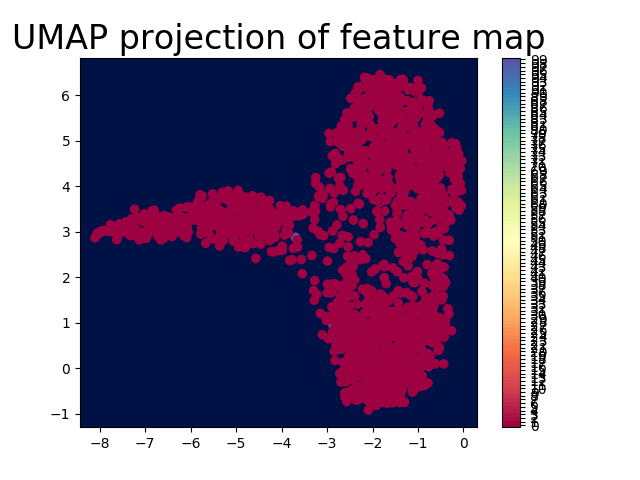

OLOLO


In [44]:
fig, ax = plt.subplots()

# aaa = ax.scatter(embedding[:, 0], embedding[:, 1], c=storage_dict['train'][4][:], cmap='Spectral', s=5)
c = storage_dict['test'][2][:]
aaa = ax.scatter(embedding[:, 0], embedding[:, 1], c=c, cmap='Spectral', picker=True)
ax.set_aspect('equal', 'datalim')
ax.set_facecolor('xkcd:navy blue')
plt.colorbar(aaa, boundaries=np.arange(np.max(c) + 1)-0.5).set_ticks(np.arange(np.max(c)))
title = plt.title('UMAP projection of feature map', fontsize=24);

# handles, labels = ax.get_legend_handles_labels()
# display = (0,1,2)
# size_max = plt.Line2D((0,1),(0,0), color='k', marker='o', markersize=max_size,linestyle='')
# size_min = plt.Line2D((0,1),(0,0), color='k', marker='o', markersize=min_size,linestyle='')
# legend1= ax.legend([handle for i,handle in enumerate(handles) if i in display]+[size_max,size_min],
# [label for i,label in enumerate(labels) if i in display]+["%.2f"%(np.amax(objs)), "%.2f"%(np.amin(objs))], labelspacing=1.5, title='OBJECTIVE 5', loc=1, frameon=True, numpoints=1, markerscale=1)


class A:
    storage='a'
    

storage = A()

# def onclick(event):
#     tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
#     storage.storage = tx
    
# cid = fig.canvas.mpl_connect('button_press_event', onclick)

def on_pick(event):
    storage.storage = str(event.ind)
    
cid = fig.canvas.mpl_connect('pick_event', on_pick)

print('OLOLO')

# Get adversarials

In [99]:
storage_names = ['prediction_storage',
'loader_feature_map_storage',
'loader_correct_number_storage,',
'loader_class_predicted_counts_storage',
'loader_target_storage',
'loader_ids_storage']

for i, name in enumerate(storage_names):
    print(i, name)
    
print()
    
for i, path in enumerate(run_pathes):
    print(i, path)

0 prediction_storage
1 loader_feature_map_storage
2 loader_correct_number_storage,
3 loader_class_predicted_counts_storage
4 loader_target_storage
5 loader_ids_storage

0 ././run_number:29-noise_std:0.005-data%model_name:./mobilenet_v2/1.checkpoint
1 ././run_number:31-noise_std:0.005-data%model_name:./mobilenet_v2/3.checkpoint
2 ././run_number:30-noise_std:0.005-data%model_name:./mobilenet_v2/2.checkpoint
3 ././run_number:28-noise_std:0.005-data%model_name:./mobilenet_v2/0.checkpoint


In [109]:
run_pathes

['././run_number:29-noise_std:0.005-data%model_name:./mobilenet_v2/1.checkpoint',
 '././run_number:31-noise_std:0.005-data%model_name:./mobilenet_v2/3.checkpoint',
 '././run_number:30-noise_std:0.005-data%model_name:./mobilenet_v2/2.checkpoint',
 '././run_number:28-noise_std:0.005-data%model_name:./mobilenet_v2/0.checkpoint']

In [101]:
run_p_numb = 2

storage_dict =  run_storage[run_pathes[run_p_numb]]

res = np.argmax(storage_dict['test'][0][:], axis=1) == np.array(storage_dict['test'][4][:])

tar = storage_dict['test'][4]

a = 0
advers_number = 0

import collections
adv_dict = collections.defaultdict(int)
for i, row in enumerate(storage_dict['test'][3]):
    if res[i]:
#         print(i,100 -row[tar[i]])
#         print(i,tar[i])
        a += 100 - row[tar[i]]
        if row[tar[i]] < 50:
            adv_dict[tar[i]]+=1
            advers_number+=1
            
        
print(advers_number, len(res))

222 1845


In [157]:
from scipy.special import softmax

softmax(storage_dict['test'][0], axis=1).shape

# storage_dict['test'][0][:].shape


(1845, 5)

In [172]:
for_loader = 'validation'
number_of_patterns = len(run_storage[run_path][for_loader][0])
ress = np.zeros((len(run_pathes) + 1, number_of_patterns))
averaged_predictions = np.zeros((number_of_patterns, 5))
for i, run_path in enumerate(run_pathes):
    storage_dict = run_storage[run_path]
    ress[i, :] = np.argmax(storage_dict[for_loader][0][:], axis=1) == np.array(storage_dict[for_loader][4][:])
    averaged_predictions += softmax(storage_dict[for_loader][0], axis=1)
    
ress[-1, :] = np.argmax(averaged_predictions, axis=1) == np.array(run_storage[run_pathes[0]][for_loader][4][:])


0.7219512195121951

In [173]:
for i in range(len(run_pathes)):
    print(np.mean(ress.mean(axis=0) >= 4/8), np.mean(ress[i,:]))
print(np.mean(ress.mean(axis=0) <= 0/8), np.mean(ress[-1,:]))

0.9815724815724816 0.7886977886977887
0.9815724815724816 0.8022113022113022
0.9815724815724816 0.7862407862407862
0.9815724815724816 0.7911547911547911
0.9815724815724816 0.7886977886977887
0.9815724815724816 0.7936117936117936
0.9815724815724816 0.7825552825552825
0.0 0.9484029484029484


In [180]:
np.sum(ress.mean(axis=0) <= 2/8)

5

In [153]:
a, b = np.unique(np.array(storage_dict['test'][4][:])[ress.mean(axis=0) < 1/7], return_index=False, return_inverse=False, return_counts=True, axis=None)
b/369

array([0.02439024, 0.08401084, 0.12737127, 0.13821138, 0.13550136])